<a href="https://colab.research.google.com/github/Jakelinecs/Tareas-Machine-Learning/blob/main/N14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

try:
    df = pd.read_csv('train.csv')
    print("✅ train.csv の読み込みが完了しました。")
except FileNotFoundError:
    print("❌ エラー: 'train.csv' が見つかりません。")
    df = pd.DataFrame()

if not df.empty:
    cols_to_drop = df.columns[df.isnull().sum() >= 5]
    df_cleaned = df.drop(columns=cols_to_drop)


    df_cleaned = df_cleaned.dropna().copy()

    df_cleaned['SalePrice_log'] = np.log(df_cleaned['SalePrice'])

    print(f"クリーニング後のデータ形状: {df_cleaned.shape}")

✅ train.csv の読み込みが完了しました。
クリーニング後のデータ形状: (1459, 64)


In [3]:
if not df.empty:
    # 特徴量と目的変数の設定
    X_cols = ['GrLivArea', 'YearBuilt']
    y_col = 'SalePrice_log'

    X = df_cleaned[X_cols].values
    y = df_cleaned[y_col].values

    # データの分割（75%を訓練、25%を検証）
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # データの標準化
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    X_train = X_train_scaled
    X_test = X_test_scaled

    print(f"使用特徴量: {X_cols}")
    print(f"訓練データ形状: {X_train.shape}")

使用特徴量: ['GrLivArea', 'YearBuilt']
訓練データ形状: (1094, 2)


In [4]:
from sklearn.linear_model import LinearRegression

# 1. 学習
lr = LinearRegression()
lr.fit(X_train, y_train)

# 2. 推定
y_pred_lr = lr.predict(X_test)

# 3. 評価 (平均二乗誤差: MSE)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("--- 線形回帰の評価 ---")
print(f"平均二乗誤差 (MSE): {mse_lr:.4f}")
print(f"決定係数 (R2): {r2_lr:.4f}")

--- 線形回帰の評価 ---
平均二乗誤差 (MSE): 0.0474
決定係数 (R2): 0.7395


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23550 (\N{CJK UNIFIED IDEOGRAPH-5BFE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22793 (\N{CJK UNIFIED IDEOGRAPH-5909}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25563 (\N{CJK UNIFIED IDEOGRAPH-63DB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  fig.canvas

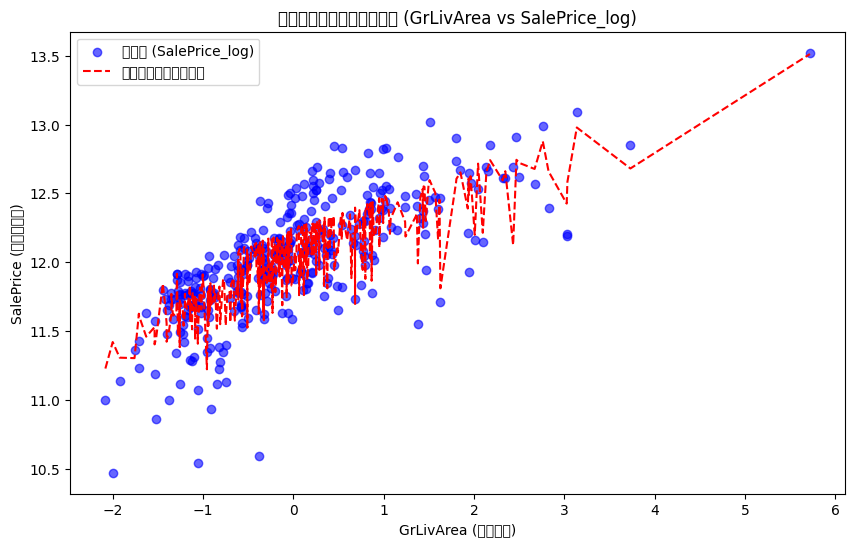

In [5]:
if not df.empty:
    grlivarea_test = X_test[:, 0]

    plt.figure(figsize=(10, 6))

    plt.scatter(grlivarea_test, y_test, color='blue', label='真の値 (SalePrice_log)', alpha=0.6)

    sort_idx = np.argsort(grlivarea_test)

    plt.plot(grlivarea_test[sort_idx], y_pred_lr[sort_idx],
             color='red', linestyle='--', label='線形回帰による予測値')

    plt.title('線形回帰モデルの予測結果 (GrLivArea vs SalePrice_log)')
    plt.xlabel('GrLivArea (標準化後)')
    plt.ylabel('SalePrice (対数変換後)')
    plt.legend()
    plt.show()
    #

--- 各回帰モデルの比較 ---

--- 回帰モデル評価指標比較表 (2特徴量) ---
                MSE  R2 Score
SVM (SVR)  0.046755  0.743204
線形回帰       0.047433  0.739479
ランダムフォレスト  0.049580  0.727689
決定木        0.074904  0.588603


/tmp/ipython-input-631142324.py:59: UserWarning: Glyph 27161 (\N{CJK UNIFIED IDEOGRAPH-6A19}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-631142324.py:59: UserWarning: Glyph 28310 (\N{CJK UNIFIED IDEOGRAPH-6E96}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-631142324.py:59: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-631142324.py:59: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-631142324.py:59: UserWarning: Glyph 23550 (\N{CJK UNIFIED IDEOGRAPH-5BFE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-631142324.py:59: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-631142324.py:59: UserWarning: Glyph 22793 (\N{CJK UNIFIED IDEOGRAPH-5909}) missing from

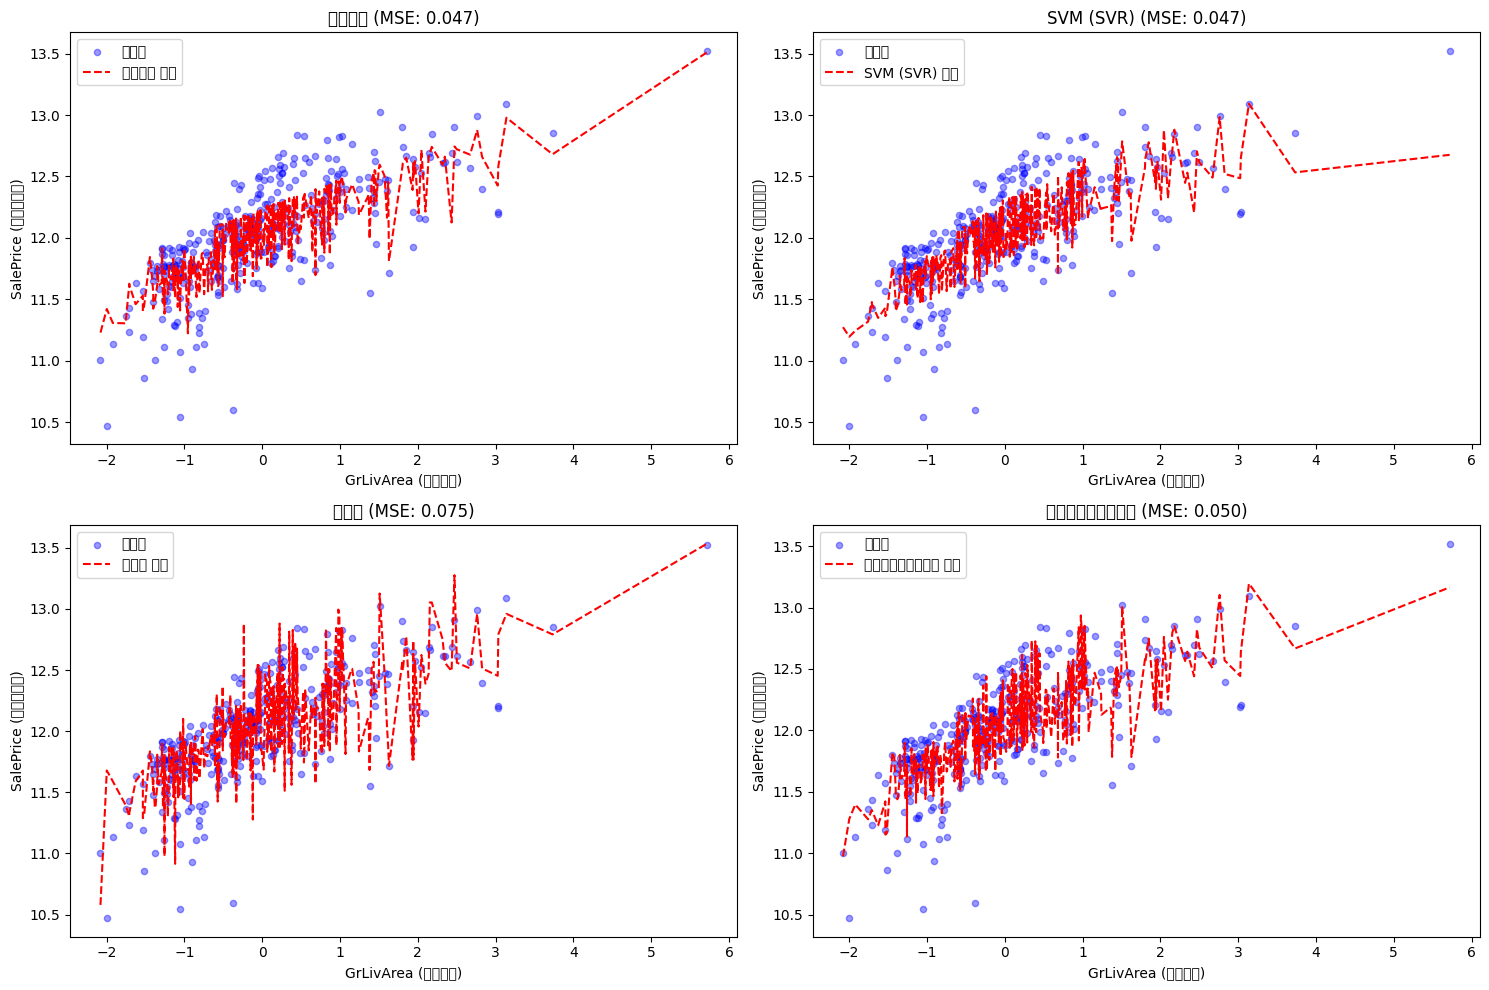

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# モデルのインスタンス化
models = {
    '線形回帰': LinearRegression(),
    'SVM (SVR)': SVR(),
    '決定木': DecisionTreeRegressor(random_state=42),
    'ランダムフォレスト': RandomForestRegressor(random_state=42),
}

comparison_results = {}

print("--- 各回帰モデルの比較 ---")
for name, model in models.items():
    # 学習
    model.fit(X_train, y_train)

    # 推定
    y_pred = model.predict(X_test)

    # 評価
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    comparison_results[name] = {'MSE': mse, 'R2 Score': r2, 'Model': model}

# 結果を表にまとめる
df_comparison = pd.DataFrame({k: {'MSE': v['MSE'], 'R2 Score': v['R2 Score']} for k, v in comparison_results.items()}).T
print("\n--- 回帰モデル評価指標比較表 (2特徴量) ---")
print(df_comparison.sort_values(by='MSE')) # MSEが小さいほど良い

# --- 可視化の比較 ---
if not df.empty:
    plt.figure(figsize=(15, 10))
    grlivarea_test = X_test[:, 0]

    for i, (name, result) in enumerate(comparison_results.items()):
        plt.subplot(2, 2, i + 1)
        model = result['Model']
        y_pred = model.predict(X_test)

        plt.scatter(grlivarea_test, y_test, color='blue', label='真の値', alpha=0.4, s=20)

        # 予測値をプロットするためにソート
        sort_idx = np.argsort(grlivarea_test)

        plt.plot(grlivarea_test[sort_idx], y_pred[sort_idx],
                 color='red', linestyle='--', label=f'{name} 予測')

        plt.title(f'{name} (MSE: {result["MSE"]:.3f})')
        plt.xlabel('GrLivArea (標準化後)')
        plt.ylabel('SalePrice (対数変換後)')
        plt.legend()

    plt.tight_layout()
    plt.show()
    #

In [10]:
# --- CÓDIGO FALTANTE (DEBE EJECUTARSE ANTES) ---

# 1. Seleccionar 2 características (ejemplo)
X_cols = ['GrLivArea', 'OverallQual']
X = df_cleaned[X_cols].values
y = df_cleaned['SalePrice_log'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 2. Estandarización
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Entrenamiento
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 4. Cálculo de Métricas
mse_rf = mean_squared_error(y_test, y_pred_rf) # <-- ¡Aquí se define mse_rf!
r2_rf = r2_score(y_test, y_pred_rf)           # <-- ¡Aquí se define r2_rf!
# -----------------------------------------------